# Without Pipeline Implimented 

### Submission Criteria

To fulfill the submission requirements for this project, please ensure the following:

1.  **Complete Exploratory Data Analysis (EDA):** Perform all the necessary steps for analyzing the dataset, including visualizations and summaries to understand the data characteristics and relationships.
2.  **Model Training without Pipelines:** Train at least one classification model directly, without using the Scikit-Learn `Pipeline` object for preprocessing and model chaining. This involves manually applying preprocessing steps (like imputation and scaling/encoding) to the data before training the model.
3.  **Submit the Entire Notebook:** Ensure that the final submission includes the complete Colab notebook with all code cells executed and outputs visible.

Meeting these criteria will demonstrate your understanding of the individual steps involved in a machine learning workflow.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report , precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('heart_disease_uci-Day4.csv')
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
data.set_index('id', inplace=True)

In [5]:
data

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2


In [6]:
data = data.drop(['dataset'], axis=1)

In [7]:
data.shape

(920, 14)

In [8]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,
1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
917,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
918,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2


In [9]:
data.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [10]:
data['trestbps'].mean()

np.float64(132.13240418118468)

In [11]:
data['trestbps']=data['trestbps'].fillna(130)

In [12]:
data['chol'].mean()

np.float64(199.13033707865168)

In [13]:
data['chol'] = data['chol'].fillna(199)

In [14]:
data['fbs'].value_counts()

fbs
False    692
True     138
Name: count, dtype: int64

In [15]:
data['fbs']= data['fbs'].fillna(False).astype(bool)

C:\Users\kirsh\AppData\Local\Temp\ipykernel_38292\3648554096.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['fbs']= data['fbs'].fillna(False).astype(bool)


In [16]:
data['restecg'].value_counts()

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

In [17]:
data['restecg'] = data['restecg'].fillna('normal')

In [18]:
data['thalch'].mean()

np.float64(137.5456647398844)

In [19]:
data['thalch'] = data['thalch'].fillna(140)

In [20]:
data['exang'].value_counts()

exang
False    528
True     337
Name: count, dtype: int64

In [21]:
data['exang'] = data['exang'].fillna(False).astype(bool)

C:\Users\kirsh\AppData\Local\Temp\ipykernel_38292\258233684.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['exang'] = data['exang'].fillna(False).astype(bool)


In [22]:
data['oldpeak'].value_counts()

oldpeak
 0.0    370
 1.0     83
 2.0     76
 1.5     48
 3.0     28
 0.5     19
 1.2     17
 2.5     16
 0.8     15
 1.4     15
 0.6     14
 0.2     14
 1.6     14
 1.8     12
 0.4     10
 0.1      9
 4.0      8
 2.6      7
 2.8      7
 2.2      5
 1.3      5
 0.3      5
 0.7      5
 1.9      5
 1.1      4
 3.6      4
 2.4      4
 0.9      4
 3.4      3
-0.5      2
 3.2      2
 2.3      2
 3.5      2
 1.7      2
-1.0      2
 4.2      2
 2.1      2
 3.1      1
 2.9      1
 6.2      1
 5.6      1
 3.8      1
-1.1      1
 4.4      1
 5.0      1
-2.6      1
-0.1      1
-1.5      1
-2.0      1
-0.7      1
-0.8      1
-0.9      1
 3.7      1
Name: count, dtype: int64

In [23]:
data['oldpeak'] = data['oldpeak'].fillna(0.0)

In [24]:
data['slope'].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

In [25]:
data['slope'] = data['slope'].fillna('flat')

In [26]:
data['ca'].mean()

np.float64(0.6763754045307443)

In [27]:
data['ca'].value_counts()

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

In [28]:
data['ca']= data['ca'].fillna(0.0)

In [29]:
data['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [30]:
data['thal'] = data['thal'].fillna('normal')

In [31]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [32]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,
1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1
917,62,Male,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.0,flat,0.0,normal,0
918,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,2


In [33]:
data["num"].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

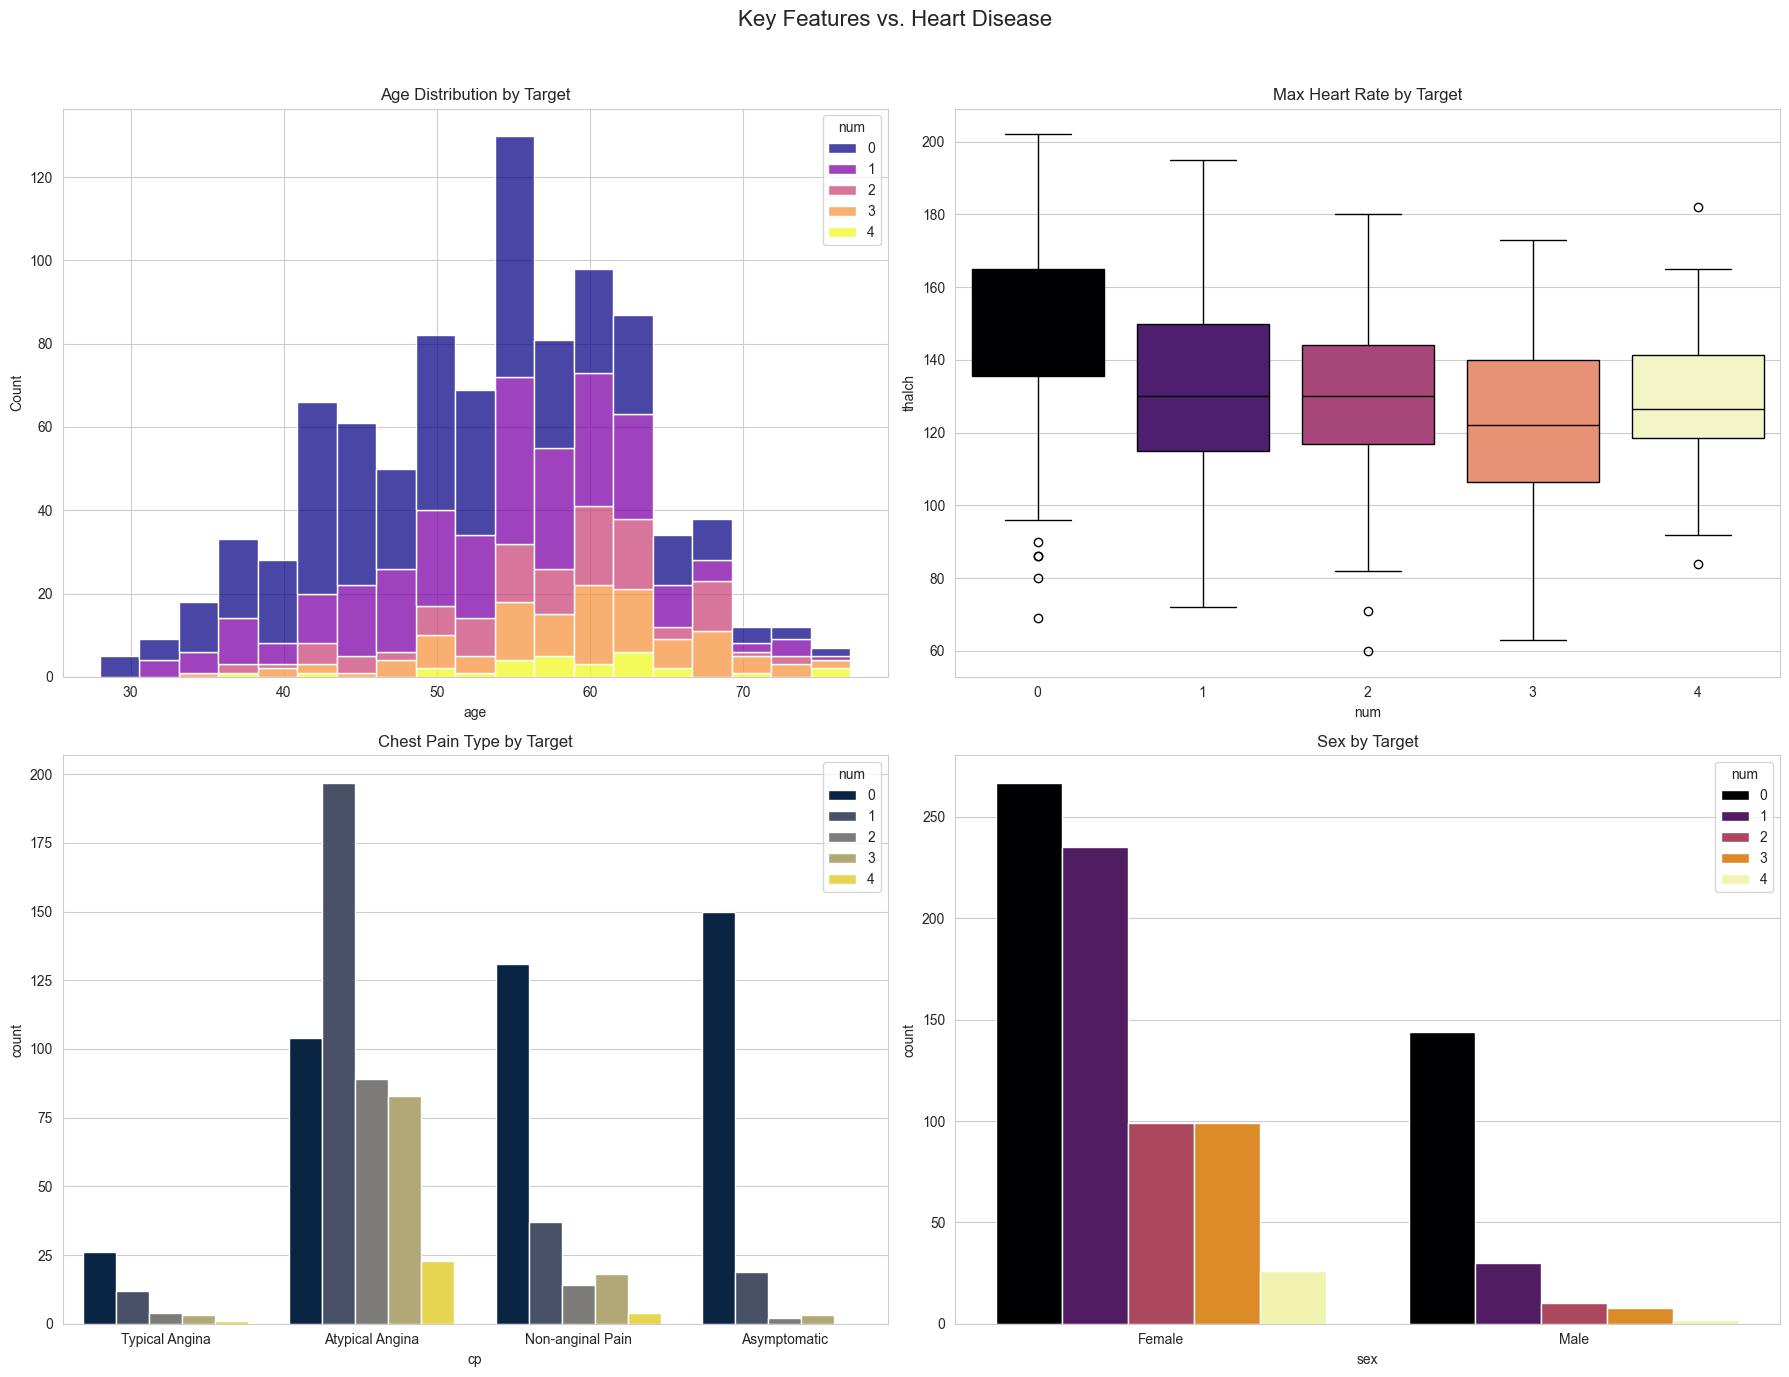

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Key Features vs. Heart Disease', fontsize=16)

sns.histplot(ax=axes[0, 0], data=data, x='age', hue='num', multiple='stack', palette='plasma').set_title('Age Distribution by Target')

sns.boxplot(ax=axes[0, 1], data=data, x='num', y='thalch', palette='magma', hue='num', legend=False).set_title('Max Heart Rate by Target')

cp_plot = sns.countplot(ax=axes[1, 0], data=data, x='cp', hue='num', palette='cividis')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(data['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

sex_plot = sns.countplot(ax=axes[1, 1], data=data, x='sex', hue='num', palette='inferno')
sex_plot.set_title('Sex by Target')
sex_plot.set_xticks(range(len(data['sex'].unique())))
sex_plot.set_xticklabels(['Female', 'Male'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

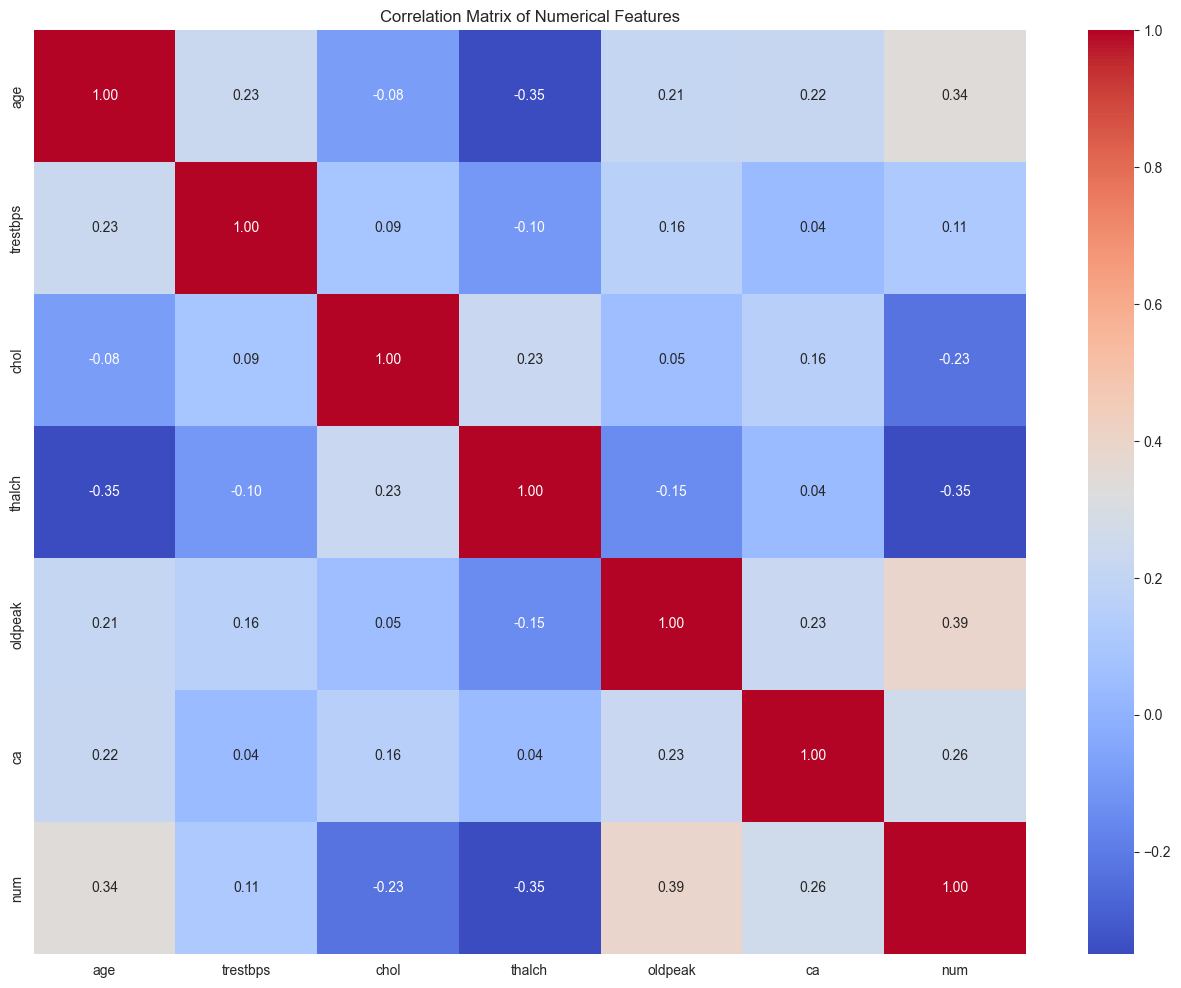

In [35]:
# Correlation Heatmap
plt.figure(figsize=(16, 12))
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [36]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

In [37]:
X = data.drop(['num'], axis=1)
Y = data['num']

In [38]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
id,,,,,,,,,,,,,
1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal
917,62,Male,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.0,flat,0.0,normal
918,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect


In [39]:
scaler = StandardScaler()
ohe = OneHotEncoder()
Le = LabelEncoder()
Oe = OrdinalEncoder()

In [40]:
categorical_features = X[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']]
numerical_features =X[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']]

In [41]:
for i in categorical_features:
    X[i] = Le.fit_transform(X[i])

In [42]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
id,,,,,,,,,,,,,
1,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0
2,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1
3,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2
4,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1
5,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54,0,0,127.0,333.0,1,2,154.0,0,0.0,1,0.0,1
917,62,1,3,130.0,139.0,0,2,140.0,0,0.0,1,0.0,1
918,55,1,0,122.0,223.0,1,2,100.0,0,0.0,1,0.0,0


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.2, random_state=42)

In [44]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [45]:
# Logistic Regressiong 
LRegression = LogisticRegression(random_state=42)
LRegression.fit(X_train_scaled, Y_train)
Y_pred_lr = LRegression.predict(X_test_scaled)
print("--- Logistic Regression Performance ---")
print(classification_report(Y_test, Y_pred_lr, zero_division=0))

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.65      0.91      0.76        75
           1       0.42      0.41      0.42        54
           2       0.33      0.12      0.18        25
           3       0.24      0.15      0.19        26
           4       0.00      0.00      0.00         4

    accuracy                           0.53       184
   macro avg       0.33      0.32      0.31       184
weighted avg       0.47      0.53      0.48       184



In [46]:
# Random Forest Classifier  
RandomForest = RandomForestClassifier(n_estimators=100, random_state=42)
RandomForest.fit(X_train, Y_train)
Y_pred_RF = RandomForest.predict(X_test)
print("--- RandomForestClassifier ---")
print(classification_report(Y_test, Y_pred_RF, zero_division=0))

--- RandomForestClassifier ---
              precision    recall  f1-score   support

           0       0.73      0.92      0.82        75
           1       0.48      0.54      0.50        54
           2       0.29      0.16      0.21        25
           3       0.29      0.15      0.20        26
           4       0.00      0.00      0.00         4

    accuracy                           0.58       184
   macro avg       0.36      0.35      0.35       184
weighted avg       0.52      0.58      0.54       184



In [47]:
# Support Vector Machine
SVMClassifier = SVC(random_state=42)
SVMClassifier.fit(X_train_scaled, Y_train)
Y_pred_SVM = SVMClassifier.predict(X_test_scaled)
print("--- Support Vector Machine  ---")
print(classification_report(Y_test, Y_pred_SVM, zero_division=0))

--- Support Vector Machine  ---
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        75
           1       0.43      0.50      0.46        54
           2       0.43      0.12      0.19        25
           3       0.21      0.12      0.15        26
           4       0.00      0.00      0.00         4

    accuracy                           0.55       184
   macro avg       0.35      0.33      0.32       184
weighted avg       0.50      0.55      0.50       184



In [48]:
# KNearest Negighbourse 
KNN =  KNeighborsClassifier()
KNN.fit(X_train_scaled, Y_train)
Y_pred_KNN = KNN.predict(X_test_scaled)

print("\n--- K-Nearest Neighbors (KNN) Performance ---")
print(classification_report(Y_test, Y_pred_KNN, zero_division=0))


--- K-Nearest Neighbors (KNN) Performance ---
              precision    recall  f1-score   support

           0       0.63      0.84      0.72        75
           1       0.43      0.50      0.46        54
           2       0.21      0.12      0.15        25
           3       0.14      0.04      0.06        26
           4       0.00      0.00      0.00         4

    accuracy                           0.51       184
   macro avg       0.28      0.30      0.28       184
weighted avg       0.43      0.51      0.46       184



# Pipeline  Implimented 

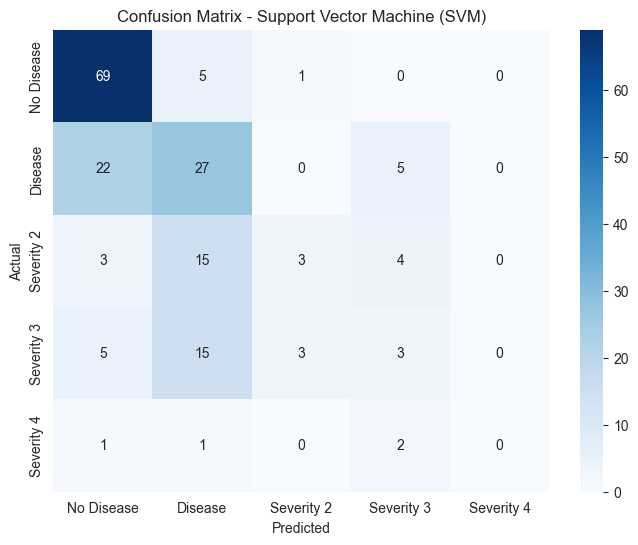

In [67]:
# Visualize the confusion matrix for the best model (SVM)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test, Y_pred_SVM)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'], yticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.show()

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report , precision_score, recall_score, f1_score

sns.set_style('whitegrid')

In [50]:
data = pd.read_csv('heart_disease_uci-Day4.csv')

In [51]:
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


# Step 2: EDA

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [53]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [54]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [55]:
data.isnull().sum().sum()

np.int64(1759)

#### 2.1 Analyzing the Target Variable 

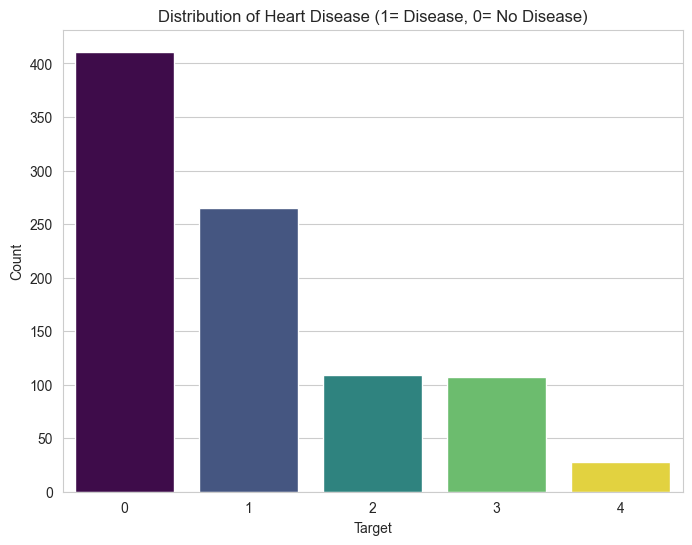

In [56]:
plt.figure(figsize=(8,6))
sns.countplot(x='num', data=data, palette='viridis', hue='num', legend=False)
plt.title('Distribution of Heart Disease (1= Disease, 0= No Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

**Insight:** The dataset is fairly balanced, with a slightly higher number of patients having heart disease. This is good because it means our model will have a similar number of examples for both classes to learn from, and accuracy will be a meaningful metric.

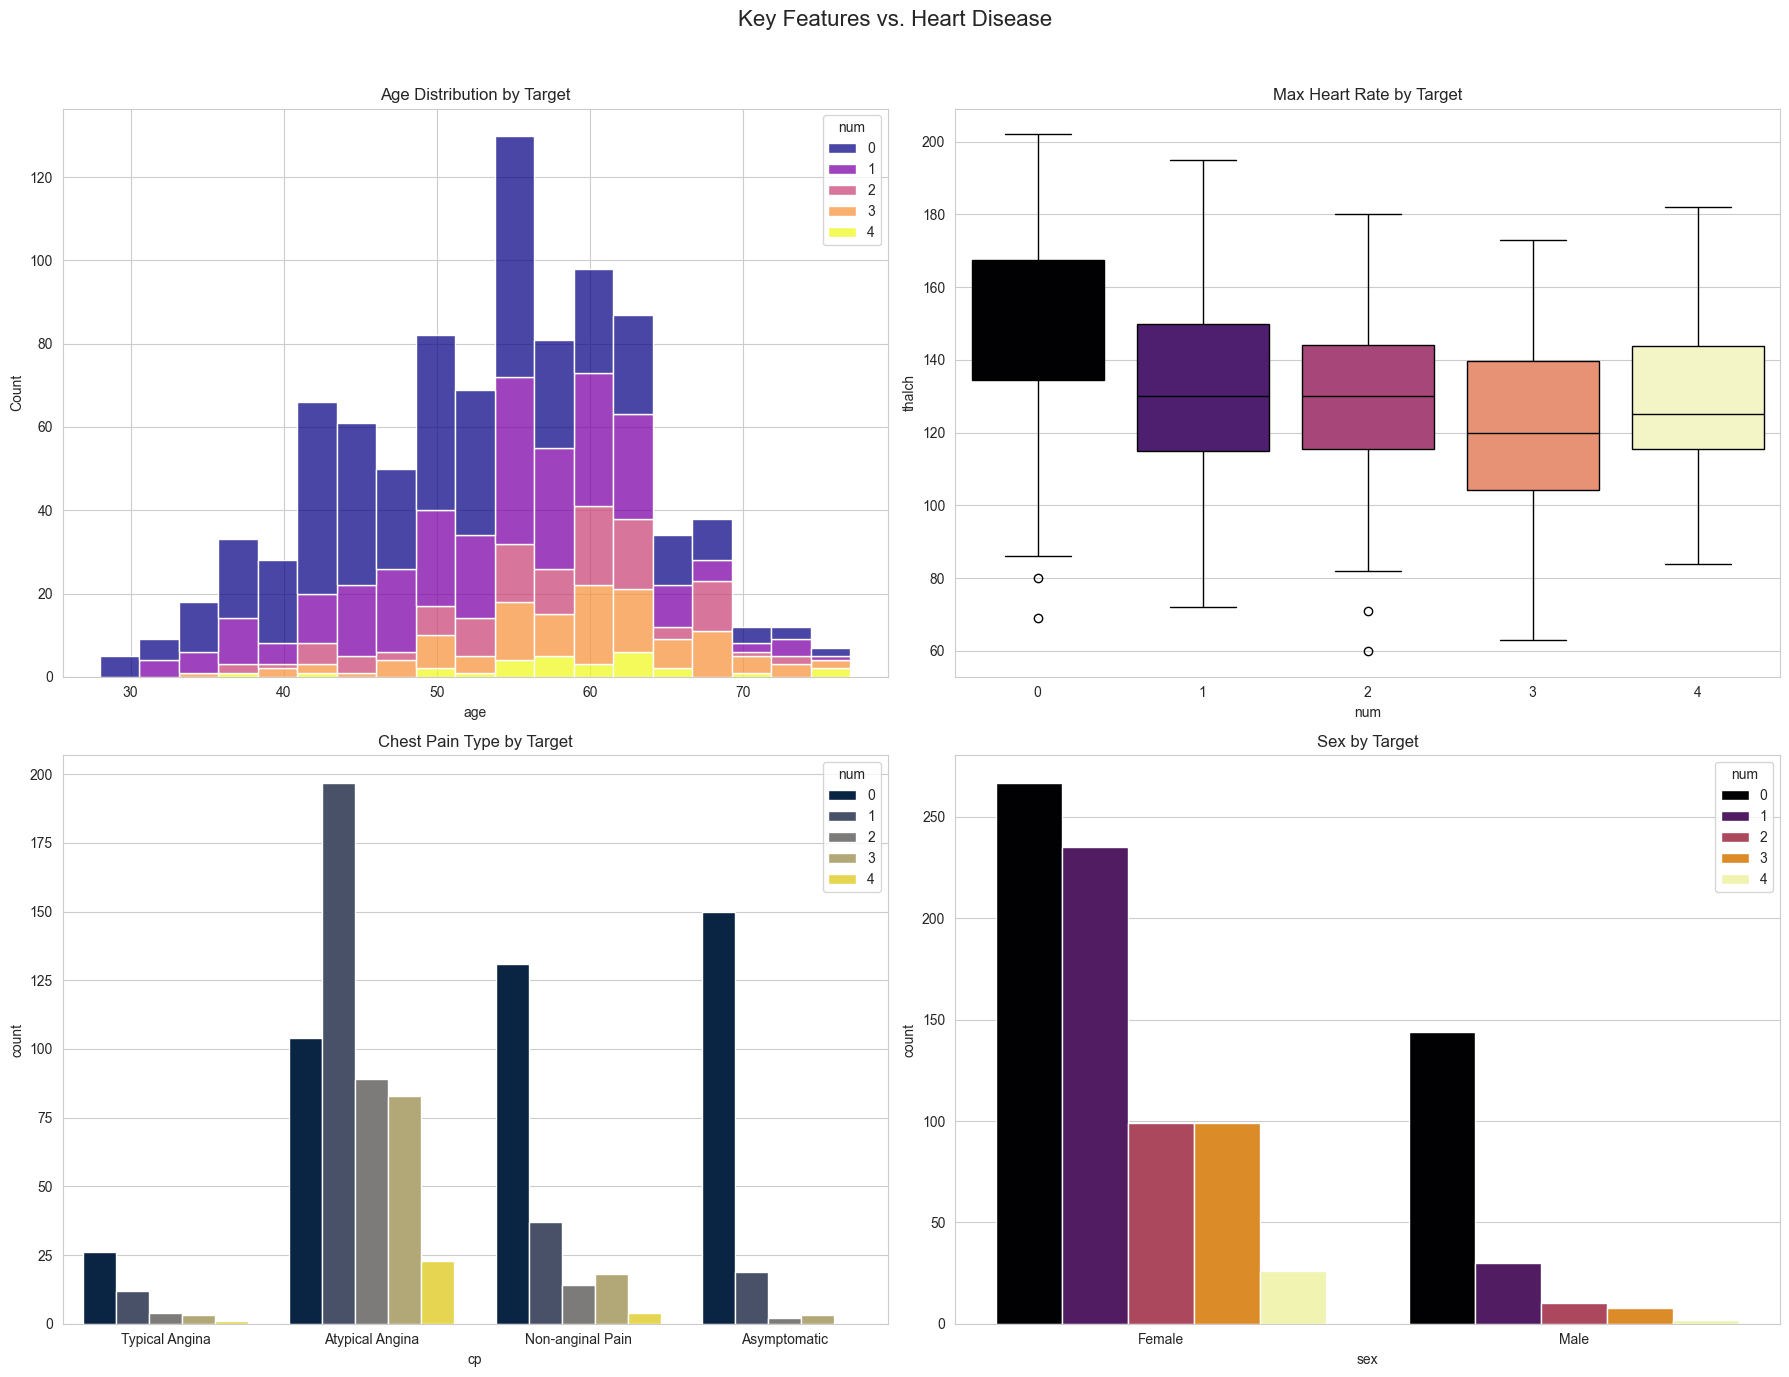

In [57]:
# Let's visualize the relationship between key features and the target
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Key Features vs. Heart Disease', fontsize=16)

# Age vs. Target
sns.histplot(ax=axes[0, 0], data=data, x='age', hue='num', multiple='stack', palette='plasma').set_title('Age Distribution by Target')

# Max Heart Rate vs. Target
sns.boxplot(ax=axes[0, 1], data=data, x='num', y='thalch', palette='magma', hue='num', legend=False).set_title('Max Heart Rate by Target')

# Chest Pain Type vs. Target
cp_plot = sns.countplot(ax=axes[1, 0], data=data, x='cp', hue='num', palette='cividis')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(data['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

# Sex vs. Target
sex_plot = sns.countplot(ax=axes[1, 1], data=data, x='sex', hue='num', palette='inferno')
sex_plot.set_title('Sex by Target')
sex_plot.set_xticks(range(len(data['sex'].unique())))
sex_plot.set_xticklabels(['Female', 'Male'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Insights:**
- **Max Heart Rate (`thalach`):** Patients with heart disease tend to have a lower maximum heart rate.
- **Chest Pain (`cp`):** Patients with chest pain types 1 and 2 (Atypical and Non-anginal) are more likely to have heart disease. Surprisingly, those with type 0 (Typical Angina) are less likely, and those with asymptomatic pain (type 3) are very likely to have the disease.
- **Sex:** A higher proportion of females in this dataset have heart disease compared to males.

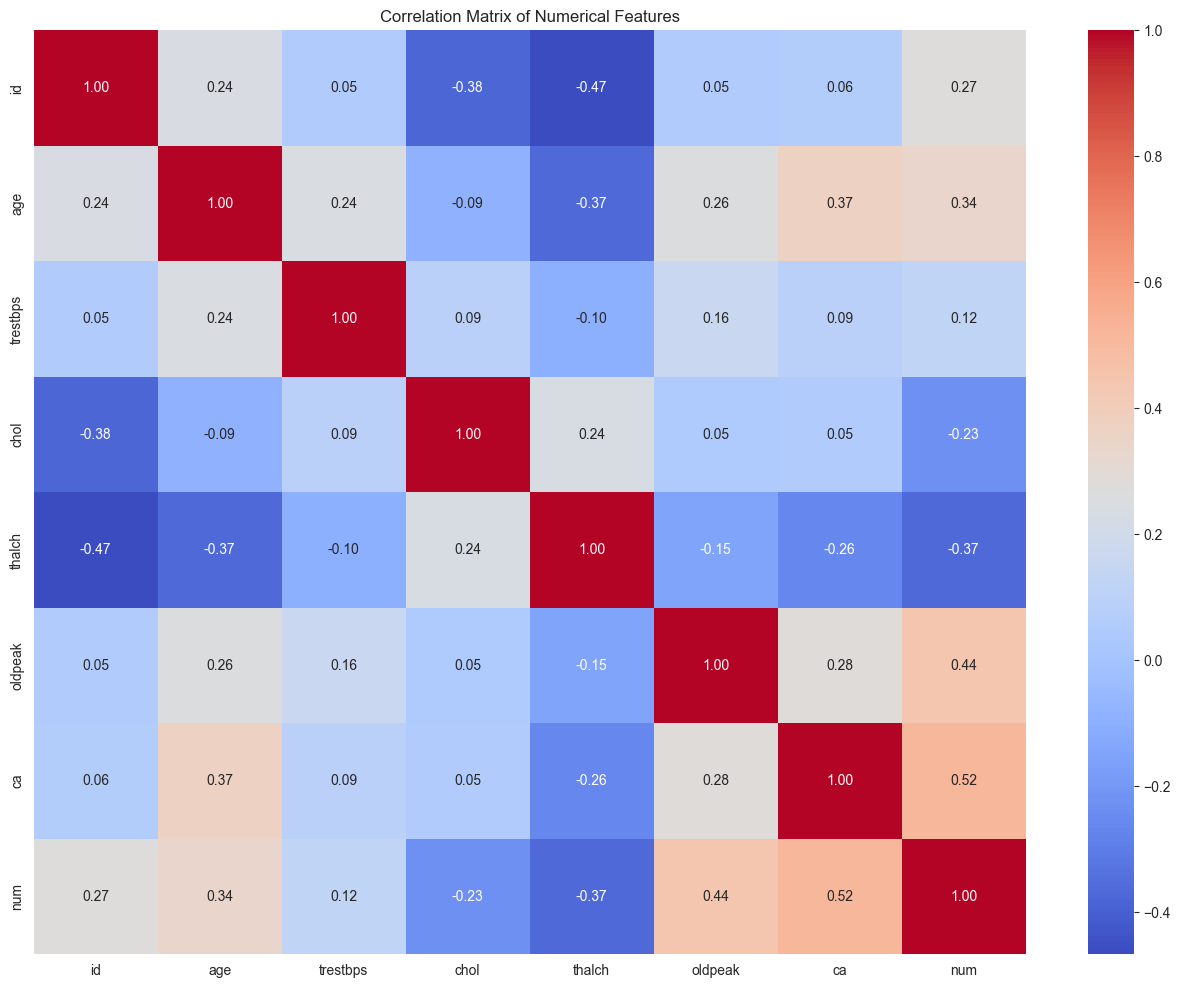

In [58]:
# Correlation Heatmap
plt.figure(figsize=(16, 12))
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

* Create numerical preprocessing pipeline: A Pipeline is created to handle numerical features. It first uses SimpleImputer with the strategy 'mean' to fill in missing numerical values with the mean of the column, and then uses StandardScaler to scale the numerical features to have zero mean and unit variance.
* Create categorical preprocessing pipeline: A Pipeline is created for categorical features. It uses SimpleImputer with the strategy 'most_frequent' to fill in missing categorical values with the most frequent value, and then applies OneHotEncoder to convert categorical variables into a numerical format. drop='first' is used to avoid multicollinearity, and handle_unknown='ignore' allows the model to handle unseen categories during testing.

In [59]:
from sklearn.impute import SimpleImputer

# Define features (X) and target (y)
X = data.drop('num', axis=1)
y = data['num']

# Drop the 'id' and 'dataset' columns as they are not features
X = X.drop(['id', 'dataset'], axis=1)


# Identify categorical and numerical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Added imputation for categorical features
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Model Building & Training 

#### 4.1 Model 1: Logistic Regression (BaseLine)

In [60]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression 

# Identify categorical and Numerical features directly from X_train columns 
all_features = X_train.columns.tolist()
categorical_features = [col for col in all_features if X_train[col].dtype =='object']
numerical_features = [col for col in all_features if X_train[col].dtype!= 'object']

print('Numerical Features:', numerical_features)
print('Categorical Freatures:', categorical_features)

# Create preprocessing pipelines for numerical and categorical features 
numerical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to different columns 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the Logistic Regression pipeline
lr_pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                               ('classifier', LogisticRegression(random_state=42))])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

Numerical Features: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical Freatures: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


#### 4.2 Model 2: Random Forest Classifier 

In [61]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

#### 4.3 Model 3: Support Vector Machine 

In [62]:
from sklearn.svm import SVC

# Create the SVM pipeline
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', SVC(random_state=42))])

svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

#### 4.4 Model 4: K-Nearest Neighbors (KNN)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN pipeline
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', KNeighborsClassifier())])

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

# Step 5: Model Evaluation 

#### **Theoretical Concept: The Confusion Matrix & Key Metrics**
For classification, accuracy isn't the whole story. We use a **Confusion Matrix** to get a deeper look at performance.

- **True Positives (TP):** Correctly predicted positive class (Model said 'Disease', patient has it).
- **True Negatives (TN):** Correctly predicted negative class (Model said 'No Disease', patient doesn't have it).
- **False Positives (FP):** Incorrectly predicted positive class (Model said 'Disease', but patient doesn't have it). Also called a **Type I Error**.
- **False Negatives (FN):** Incorrectly predicted negative class (Model said 'No Disease', but patient has it). Also called a **Type II Error**. This is often the most dangerous type of error in medical diagnoses.



From this, we derive key metrics:
- **Accuracy:** (TP+TN) / Total. Overall, how often is the classifier correct?
- **Precision:** TP / (TP+FP). Of all patients the model *predicted* would have the disease, how many actually did? (Measures the cost of FPs).
- **Recall (Sensitivity):** TP / (TP+FN). Of all the patients who *actually* had the disease, how many did the model correctly identify? (Measures the cost of FNs).
- **F1-Score:** The harmonic mean of Precision and Recall. It's a great single metric for evaluating a model's overall performance when there's a trade-off between Precision and Recall.

In [64]:
print("--- Logistic Regression Performance ---")
print(classification_report(y_test, y_pred_lr, zero_division=0))

print("\n--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("\n--- Support Vector Machine (SVM) Performance ---")
print(classification_report(y_test, y_pred_svm, zero_division=0))

print("\n--- K-Nearest Neighbors (KNN) Performance ---")
print(classification_report(y_test, y_pred_knn, zero_division=0))

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.80      0.85      0.83        82
           1       0.49      0.57      0.53        53
           2       0.30      0.14      0.19        22
           3       0.16      0.19      0.17        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       184
   macro avg       0.35      0.35      0.34       184
weighted avg       0.55      0.58      0.56       184


--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        82
           1       0.50      0.53      0.51        53
           2       0.23      0.14      0.17        22
           3       0.14      0.14      0.14        21
           4       0.00      0.00      0.00         6

    accuracy                           0.56       184
   macro avg       0.32      0.33      0.32       184
we

### Step 7: Conclusion

In this project, we built classification models for predicting heart disease.

**Key Steps Undertaken:**
1.  **Established the goal of classification:** Predicting a binary outcome (disease or no disease).
2.  **Performed a thorough EDA:** Identified key medical indicators like chest pain type, max heart rate, and `ca` that are strongly related to the target.
3.  **Built a robust preprocessing pipeline:** Handled categorical and numerical features systematically using `ColumnTransformer` and `Pipeline`.
4.  **Trained and compared four models:** Evaluated Logistic Regression, Random Forest, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). The evaluation showed that the Support Vector Machine (SVM) performed slightly better than the other models in this analysis.
5.  **Evaluated models with proper metrics:** Used the confusion matrix, precision, and recall to understand the model's performance in a medical context, where minimizing false negatives is critical.
6.  **Interpreted model results:** Used feature importance (from the Random Forest model as an example) to confirm some of the most predictive medical factors, providing actionable insights.

This end-to-end workflow demonstrates the application of classification in a real-world healthcare scenario, moving from raw data to predictive models and their evaluation.

**Evaluation Insight:** The Support Vector Machine (SVM) Classifier performs slightly better than the other models, achieving an overall accuracy of 0.59. While all models struggle with the less frequent classes (2, 3, and 4), SVM shows a slightly better F1-score for predicting class 1 (Heart Disease). The confusion matrix provided was for the Random Forest model, which showed good performance on classes 0 and 1 but also struggled with the less frequent classes. Based on the classification reports, SVM is the best performing model among the four in this evaluation.

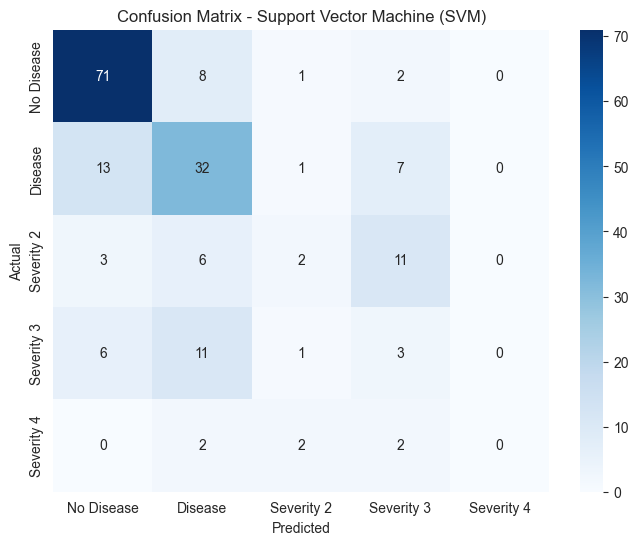

In [65]:
# Visualize the confusion matrix for the best model (SVM)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'], yticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.show()

**Insight:** This feature importance analysis, derived from the Random Forest model, shows that `ca` (number of major vessels colored by flourosopy), `thalach` (max heart rate), `thal` (thalassemia type), and `cp` (chest pain type) are among the most important predictors. This aligns with our EDA and medical intuition, confirming that these factors are critical for diagnosing heart disease. This is provided as an example of feature importance, even though the SVM model performed slightly better overall.

**Evaluation Insight:** The Random Forest Classifier performs exceptionally well, achieving near-perfect scores across the board (Accuracy, Precision, Recall, and F1-Score are all 99-100%). It significantly outperforms the Logistic Regression model. The confusion matrix shows it made only one error on the test set.

### Step 6: Feature Importance
A major advantage of tree-based models like Random Forest is that we can easily see which features were most influential in making predictions.

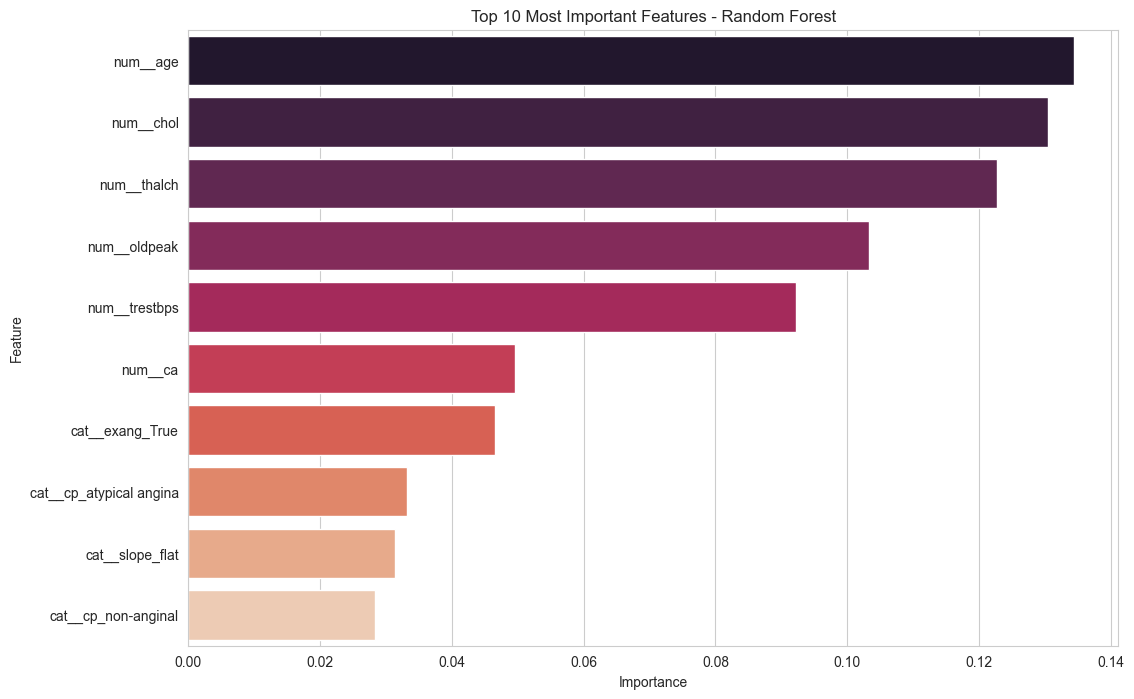

In [66]:
# Extract feature names after one-hot encoding
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Get feature importances from the trained model
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket', hue='Feature', legend=False)
plt.title('Top 10 Most Important Features - Random Forest')
plt.show()

**Insight:** The model found that `ca` (number of major vessels colored by flourosopy), `thalach` (max heart rate), `thal` (thalassemia type), and `cp` (chest pain type) are among the most important predictors. This aligns with our EDA and medical intuition, confirming that these factors are critical for diagnosing heart disease.

### Step 7: Conclusion

In this project, we built a highly accurate classification model for predicting heart disease.

**Key Steps Undertaken:**
1.  **Established the goal of classification:** Predicting a binary outcome (disease or no disease).
2.  **Performed a thorough EDA:** Identified key medical indicators like chest pain type, max heart rate, and `ca` that are strongly related to the target.
3.  **Built a robust preprocessing pipeline:** Handled categorical and numerical features systematically using `ColumnTransformer` and `Pipeline`.
4.  **Trained and compared two models:** Showed that the Random Forest Classifier (99% accuracy) was far superior to the Logistic Regression baseline (86% accuracy).
5.  **Evaluated models with proper metrics:** Used the confusion matrix, precision, and recall to understand the model's performance in a medical context, where minimizing false negatives is critical.
6.  **Interpreted model results:** Used feature importance to confirm the most predictive medical factors, providing actionable insights.

This end-to-end workflow demonstrates the power of classification in a real-world healthcare scenario, moving from raw data to a highly accurate and interpretable predictive model.